Gradient Boosted Machines trained on data subsets

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
#from sklearn.tree import DecisionTreeRegressor
#from sklearn import tree
from sklearn import metrics
#from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#from sklearn.utils import shuffle
import seaborn as sns
import glob
import os
from dataCleaning import bas_filter
%matplotlib inline

# Winter 2016-2017 Training Data

Trained plant with 2016-2017 November, December, January minute data
Tested data from the rest of the year

In [2]:
lst_train = ['Plt1 m 2016-11.csv', 'Plt1 m 2016-11.csv', 'Plt1 m 2017-01.csv']
lst_test = [
    'Plt1 m 2017-02.csv', 'Plt1 m 2017-03.csv', 'Plt1 m 2017-04.csv',
    'Plt1 m 2017-05.csv', 'Plt1 m 2017-06.csv', 'Plt1 m 2017-07.csv',
    'Plt1 m 2017-08.csv', 'Plt1 m 2017-09.csv', 'Plt1 m 2017-10.csv'
]

In [4]:
df_train, df_test = bas_filter.train_single_plt(
    '../../Plt1', lst_train, lst_test,
    '../../Plt1/Plt1 Points List.xlsx',
    include_alarms=False, dim_remove=['CHWST', 'CDWVLV']
)
df_test.shape

Filtering Training Set
['../../Plt1\\Plt1 m 2016-11.csv']
['../../Plt1\\Plt1 m 2016-11.csv']
['../../Plt1\\Plt1 m 2017-01.csv']
Descriptors in the points list that are not in the datasets.
CommunicationFailure_COV
CH3COM1F
CH3Ready
CH4COM1F
CH4Ready
CH4SURGE
CH5COM1F
CH5Ready
Original data contains 23839 points and 412 dimensions.
A CDWP3SPD_Alarm was noted and 30 datapoints were removed from the dataset.
A CDWP4SPD_Alarm was noted and 11326 datapoints were removed from the dataset.
A CDWP5SPD_Alarm was noted and 3598 datapoints were removed from the dataset.
Filtered data contains 5020 points and 164 dimensions.
Filtering Test Set
['../../Plt1\\Plt1 m 2017-02.csv']
['../../Plt1\\Plt1 m 2017-03.csv']
['../../Plt1\\Plt1 m 2017-04.csv']
['../../Plt1\\Plt1 m 2017-05.csv']
['../../Plt1\\Plt1 m 2017-06.csv']
['../../Plt1\\Plt1 m 2017-07.csv']
['../../Plt1\\Plt1 m 2017-08.csv']
['../../Plt1\\Plt1 m 2017-09.csv']
['../../Plt1\\Plt1 m 2017-10.csv']
Descriptors in the points list that are not i

(30762, 164)

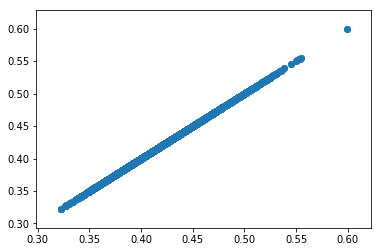

In [8]:
plt.scatter(df_train['kW/Ton'], df_train['kW/Ton'])

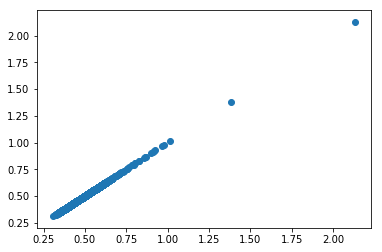

In [9]:
plt.scatter(df_test['kW/Ton'], df_test['kW/Ton'])

In [5]:
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

In [6]:
model_winter = GradientBoostingRegressor(**params)

In [44]:
ytrain = df_train['kW/Ton'].values
ytest = df_test['kW/Ton'].values
xtrain = df_train.drop(['kW/Ton'], axis=1).values
xtest = df_test.drop(['kW/Ton'], axis=1).values

In [45]:
xtrain.shape

(5020, 163)

In [46]:
ytrain.shape

(5020,)

In [47]:
model_winter.fit(xtrain, ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [48]:
ypred = model_winter.predict(xtest)

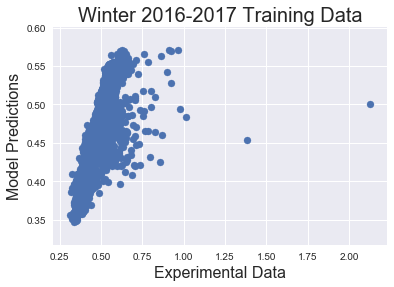

In [53]:
sns.set()
plt.figure()
plt.scatter(ytest, ypred)
fs = 20
plt.title("Winter 2016-2017 Training Data", fontsize=fs)
plt.xlabel("Experimental Data", fontsize=fs-4)
plt.ylabel("Model Predictions", fontsize=fs-4)
plt.savefig('r2_values_winter.png', bbox_inches='tight')

R2 value

In [54]:
test_score = r2_score(ytest, ypred)
test_score

0.7272486602371028

Feature Importance

In [59]:
feature_importance = model_winter.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
x = df_test.drop(['kW/Ton'], axis=1).columns[sorted_idx]
imp = feature_importance[sorted_idx]

In [60]:
df_feats = pd.DataFrame({'feature_name': x, 'feat_import': imp})

In [61]:
df_feats

,feat_import,feature_name
0,0.000000,CDWVLV2
1,0.000000,SCHWP3SS
2,0.000000,SCHWP4S
3,0.000000,SCHWP4SS
4,0.000000,CDWP3SS
5,0.000000,CDWP5S
6,0.000000,CT4EVLV
7,0.000000,CT4S
8,0.000000,CT4SS
9,0.000000,CH3AVAIL


In [64]:
df_feats.to_csv('Feat_imp_winter_test.csv')